Устанавливает пакеты

In [1]:
import gdown
url = 'https://drive.google.com/uc?id=1ZRfk1_k39fVRSyqByqqcBQW0XDJyH-RZ'
output = 'fdd-defense.zip'
gdown.download(url, output, quiet=False)

ModuleNotFoundError: No module named 'gdown'

In [3]:
!pip install fdd-defense.zip

Processing c:\users\akil\pycharmprojects\neironka\fdd-defense.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Cloning https://github.com/airi-industrial-ai/fddbenchmark to c:\users\akil\appdata\local\temp\pip-install-vxvuntvb\fddbenchmark_5fa3f0e4cc424e149d8fdc4ad474219e
  Resolved https://github.com/airi-industrial-ai/fddbenchmark to commit c0a08db36bc6e7759afb4b934a359afbe550ae72
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 323.6/323.6 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB ? eta 0:00:00
  Created wheel for fdd-defense: filename=fdd_defense-0.0.1-py3-none-any.whl size=11927 sha256=0b489dc8e82e11b788c20a71c520e80742a22dc1df6b23cd260114302e730e12
  Stored in directory: c:\users\akil\appdata\local\pip\cache\wheels\88\d1\c3\4fdc5e201d08fedf72e072094842a7acba6fd88f0068923485
  Created wh

  Running command git clone --filter=blob:none --quiet https://github.com/airi-industrial-ai/fddbenchmark 'C:\Users\akil\AppData\Local\Temp\pip-install-vxvuntvb\fddbenchmark_5fa3f0e4cc424e149d8fdc4ad474219e'

[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install git+https://github.com/airi-industrial-ai/fddbenchmark

  Cloning https://github.com/airi-industrial-ai/fddbenchmark to c:\users\akil\appdata\local\temp\pip-req-build-m1w28q_8
  Resolved https://github.com/airi-industrial-ai/fddbenchmark to commit c0a08db36bc6e7759afb4b934a359afbe550ae72
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/airi-industrial-ai/fddbenchmark 'C:\Users\akil\AppData\Local\Temp\pip-req-build-m1w28q_8'

[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import wandb
from fddbenchmark import FDDDataset, FDDDataloader, FDDEvaluator
from fdd_defense.attacks import FGSMAttack, PGDAttack, DeepfoolLinfAttack, NoiseAttack
from fdd_defense.models.base import BaseTorchModel
from fdd_defense.models import MLP
import torch. nn as nn
from torch.optim import Adam
import torch
import torch.nn.functional as F
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from fdd_defense.defenders import DistillationDefender, QuantizationDefender, AdversarialTrainingDefender

Загружаем маленький теп

In [18]:
dataset = FDDDataset(name='small_tep')
dataset.df.head()

Reading data/small_tep/test_mask.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 153300/153300 [00:00<00:00, 3074344.25it/s]


xmeas_1  xmeas_2  xmeas_3  xmeas_4  xmeas_5  xmeas_6  \
run_id    sample                                                         
413402073 1       0.25038   3674.0   4529.0   9.2320   26.889   42.402   
          2       0.25109   3659.4   4556.6   9.4264   26.721   42.576   
          3       0.25038   3660.3   4477.8   9.4426   26.875   42.070   
          4       0.24977   3661.3   4512.1   9.4776   26.758   42.063   
          5       0.29405   3679.0   4497.0   9.3381   26.889   42.650   

                  xmeas_7  xmeas_8  xmeas_9  xmeas_10  ...   xmv_2   xmv_3  \
run_id    sample                                       ...                   
413402073 1        2704.3   74.863   120.41   0.33818  ...  53.744  24.657   
          2        2705.0   75.000   120.41   0.33620  ...  53.414  24.588   
          3        2706.2   74.771   120.42   0.33563  ...  54.357  24.666   
          4        2707.2   75.224   120.39   0.33553  ...  53.946  24.725   
          5        2705.1   75.388   120.39   0.32632  ...  53.658  28.797   

                   xmv_4   xmv_5   xmv_6   xmv_7   xmv_8   xmv_9  xmv_10  \
run_id    sample                                                           
413402073 1       62.544  22.137  39.935  42.323  47.757  47.510  41.258   
          2       59.259  22.084  40.176  38.554  43.692  47.427  41.359   
          3       61.275  22.380  40.244  38.990  46.699  47.468  41.199   
          4       59.856  22.277  40.257  38.072  47.541  47.658  41.643   
          5       60.717  21.947  39.144  41.955  47.645  47.346  41.507   

                  xmv_11  
run_id    sample          
413402073 1       18.447  
          2       17.194  
          3       20.530  
          4       18.089  
          5       18.461  

[5 rows x 52 columns]

In [19]:
scaler = StandardScaler()
scaler.fit(dataset.df[dataset.train_mask])
dataset.df[:] = scaler.transform(dataset.df)

In [4]:
import wandb


In [ ]:
def train():
   with wandb.init() as run:
       config = wandb.config
       model = MLP(**config)
       for epoch in range(config["num_epochs"]):
           loss = model.fit(dataset)  # your model training code here
           wandb.log({"loss": loss, "epoch": epoch})

sweep_config = {
 "name" : "my-sweep",
 "method" : "bayes",
 "metric" : {'goal': "minimize",
            'name': 'loss'},
   
 "parameters" : {
     "step_size" :{
     "value": 1
   },
   "hidden_dim" :{
     "min": 200,
     "max": 250
   },
   "num_epochs" : {
     "min":20,
       "max":30
   },
   "batch_size" :{
     "min": 350,
     "max": 400
   },
   "lr" :{
     "min": 0.0001,
     "max": 0.0025
   },
   "window_size" :{
     "value": 10
   }
   
 }
}

sweep_id = wandb.sweep(sweep_config)
count = 10 # number of runs to execute
wandb.agent(sweep_id, function=train, count=count)

Create sweep with ID: 2rd67gdb
Sweep URL: https://wandb.ai/gardrazi/uncategorized/sweeps/2rd67gdb


wandb: Agent Starting Run: 3zbenitv with config:
wandb: 	batch_size: 353
wandb: 	hidden_dim: 218
wandb: 	lr: 0.000531934703022011
wandb: 	num_epochs: 21
wandb: 	step_size: 1
wandb: 	window_size: 10
wandb: Currently logged in as: kesha1997g (gardrazi). Use `wandb login --relogin` to force relogin


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1754.71it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4368


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8849


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7489


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6790


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6254


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5847


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5508


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5212


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4957


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4742


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4557


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4399


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4259


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4134


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.4021


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3921


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3830


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3748


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3674


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3605


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3543


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.19it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4134


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8784


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7509


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6885


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6364


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5957


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5620


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5314


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.5044


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4816


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4625


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4463


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4322


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4199


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.4088


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3989


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3898


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3817


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3743


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3674


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3611


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1738.51it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4343


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8846


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7538


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6914


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6366


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5908


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5533


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5229


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4979


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4768


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4584


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4423


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4281


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4155


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.4043


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3943


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3852


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3770


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3696


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3629


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3567


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1877.97it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4332


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8808


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7500


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6833


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6282


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5858


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5501


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5194


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4936


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4721


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4538


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4381


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4245


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4124


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.4016


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3919


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3830


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3751


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3678


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3611


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3549


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1784.43it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4511


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8900


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7555


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6911


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6341


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5875


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5491


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5173


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4911


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4692


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4506


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4347


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4207


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4085


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3977


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3883


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3799


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3723


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3655


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3593


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3535


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1830.55it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4398


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8950


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7596


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6902


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6366


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5961


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5618


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5310


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.5044


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4818


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4624


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4458


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4312


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4183


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.4069


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3969


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3879


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3797


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3723


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3657


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3595


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1754.69it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4643


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8855


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7495


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6784


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6210


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5771


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5412


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5114


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4869


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4663


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4485


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4331


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4195


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4078


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3974


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3882


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3799


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3724


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3656


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3593


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3534


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1815.28it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4477


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8817


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7508


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6839


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6283


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5835


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5470


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5170


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4921


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4713


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4537


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4385


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4254


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4136


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.4031


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3936


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3851


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3773


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3701


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3635


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3574


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1879.99it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4342


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8801


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7477


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6807


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6260


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5833


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5484


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5195


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4955


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4754


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4581


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4431


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4299


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4179


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.4072


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3976


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3889


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3808


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3735


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3668


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3607


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1815.16it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4719


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8891


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7538


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6877


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6290


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5830


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5473


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5187


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4955


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4759


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4589


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4439


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4306


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4185


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.4078


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3980


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3892


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3811


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3737


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3669


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3606


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1879.86it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4601


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8773


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7406


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6658


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6072


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5625


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5275


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5001


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4778


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4590


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4429


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4287


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4162


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4049


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3946


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3853


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3769


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3695


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3626


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3565


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3507


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1754.67it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4393


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8902


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7506


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6806


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6263


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5819


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5453


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5151


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4902


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4695


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4518


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4366


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4233


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4114


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.4009


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3915


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3831


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3755


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3686


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3623


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3566


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1829.74it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4349


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8860


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7489


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6804


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6290


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5890


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5537


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5227


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4964


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4743


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4555


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4393


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4251


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4126


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.4014


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3915


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3826


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3746


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3673


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3608


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3546


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1846.99it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4557


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8874


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7495


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6763


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6189


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5751


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5385


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5079


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4827


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4618


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4442


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4290


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4157


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4042


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3940


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3850


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3770


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3697


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3630


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3570


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3514


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1847.04it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4310


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8786


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7487


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6795


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6253


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5835


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5491


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5209


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4974


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4775


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4602


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4449


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4313


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4191


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.4082


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3982


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3890


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3808


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3732


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3662


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3597


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1986.47it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4340


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8856


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7523


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6827


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6254


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5804


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5435


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5131


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4889


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4690


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4521


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4375


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4247


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4133


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.4030


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3937


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3852


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3774


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3703


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3636


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3574


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.13it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4473


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8823


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7526


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6886


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6329


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5881


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5514


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5203


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4941


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4723


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4540


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4383


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4246


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4127


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.4021


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3927


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3841


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3764


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3694


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3630


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3569


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.19it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4299


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8763


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7433


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6756


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6202


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5772


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5419


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5123


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4874


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4661


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4478


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4319


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4180


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4058


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3952


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3858


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3774


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3698


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3629


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3566


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3508


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1880.07it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4402


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8861


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7506


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6815


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6236


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5784


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5424


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5130


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4887


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4679


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4501


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4345


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4206


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4084


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3976


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3880


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3795


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3719


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3650


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3588


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3531


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1815.24it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4429


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8845


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7517


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6838


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6262


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5827


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5465


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5155


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4896


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4681


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4501


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4347


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4214


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4097


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3993


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3900


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3816


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3741


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3672


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3608


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3549


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.23it/s]


Epochs ...:   0%|          | 0/21 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 1, Loss: 1.4447


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 2, Loss: 0.8803


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 3, Loss: 0.7486


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 4, Loss: 0.6809


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 5, Loss: 0.6255


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5814


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5446


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5141


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4893


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4689


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4517


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4367


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4235


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4118


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 15, Loss: 0.4014


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3922


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3838


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3762


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3693


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3629


Steps ...:   0%|          | 0/146 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3571


epoch,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
loss,▃█▅▄▃▇▃▆██▁▅▄▁▇▅▅▁▃▄▅
epoch,20
loss,0.35709


wandb: Agent Starting Run: hbcr9kh6 with config:
wandb: 	batch_size: 371
wandb: 	hidden_dim: 206
wandb: 	lr: 0.002107074878718058
wandb: 	num_epochs: 22
wandb: 	step_size: 1
wandb: 	window_size: 10


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1880.01it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0449


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6499


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5248


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4633


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4245


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3972


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3774


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3626


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3514


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3419


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3338


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3287


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3214


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3155


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3100


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3042


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3032


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2958


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2915


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2865


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2837


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2808


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.16it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0647


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6617


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5449


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4757


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4313


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4007


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3799


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3652


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3544


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3461


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3371


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3299


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3245


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3190


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3136


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3091


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3056


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3013


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2968


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2949


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2892


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2876


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1860.70it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0537


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6472


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5357


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4658


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4234


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3954


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3748


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3601


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3487


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3398


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3336


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3256


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3190


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3120


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3058


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3004


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2970


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2915


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2873


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2838


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2862


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2795


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.66it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0566


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6628


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5383


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4649


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4209


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3931


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3738


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3633


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3481


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3381


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3307


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3236


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3172


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3115


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3059


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3008


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2969


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2912


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2868


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2836


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2806


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2792


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1880.01it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0688


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6465


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5337


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4663


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4246


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3965


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3759


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3631


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3516


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3417


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3365


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3273


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3197


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3133


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3089


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3032


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2976


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2923


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2881


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2898


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2830


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2791


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1879.99it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0483


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6451


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5374


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4703


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4279


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3996


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3799


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3650


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3536


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3445


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3383


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3296


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3231


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3178


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3114


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3054


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3009


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2960


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2916


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2889


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2894


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2833


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1754.02it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0657


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6584


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5436


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4745


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4302


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3987


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3772


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3618


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3501


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3417


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3326


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3246


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3172


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3103


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3048


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2995


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2951


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2921


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2854


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2810


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2779


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2739


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1986.41it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0636


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6578


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5440


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4704


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4227


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3926


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3729


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3590


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3482


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3392


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3317


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3249


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3197


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3119


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3066


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3008


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2952


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2910


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2873


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2843


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2818


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2796


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2024.66it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0502


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6697


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5504


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4808


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4373


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4065


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3859


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3685


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3574


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3473


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3400


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3348


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3279


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3221


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3191


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3182


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3089


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3056


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2989


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2930


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2896


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2857


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2024.66it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0415


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6456


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5291


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4630


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4213


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3917


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3741


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3603


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3484


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3388


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3313


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3240


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3203


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3112


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3054


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3009


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2960


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2916


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2882


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2884


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2881


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2897


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.66it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0523


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6698


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5412


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4681


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4273


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4000


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3800


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3656


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3531


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3435


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3354


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3311


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3205


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3133


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3078


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3023


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2978


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2930


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2879


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2849


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2807


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2774


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2105.58it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0558


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6518


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5417


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4681


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4224


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3951


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3760


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3639


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3521


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3423


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3335


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3262


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3201


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3137


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3080


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3023


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2972


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2922


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2878


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2824


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2805


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2761


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2061.65it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0571


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6636


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5469


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4785


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4325


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4026


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3815


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3669


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3554


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3467


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3374


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3302


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3242


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3177


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3127


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3079


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3063


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3044


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2994


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2936


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2877


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2819


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.19it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0539


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6630


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5475


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4726


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4264


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3962


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3771


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3626


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3512


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3442


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3343


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3257


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3189


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3125


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3063


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3009


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2993


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2927


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2886


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2832


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2812


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2766


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.16it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0462


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6510


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5459


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4772


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4335


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4035


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3820


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3666


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3550


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3446


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3356


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3277


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3195


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3124


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3054


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2994


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2928


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2897


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2862


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2815


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2773


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2735


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1947.40it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0467


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6524


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5424


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4754


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4318


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4026


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3829


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3672


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3556


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3461


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3391


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3303


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3242


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3178


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3141


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3088


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3027


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2981


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2940


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2897


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2868


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2836


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1880.06it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0726


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6530


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5414


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4670


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4236


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3949


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3759


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3621


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3509


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3417


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3330


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3268


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3206


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3131


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3101


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3020


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2974


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2925


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2879


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2870


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2822


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2782


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1880.01it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0458


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6568


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5404


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4710


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4255


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3951


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3744


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3607


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3496


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3401


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3318


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3242


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3175


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3148


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3074


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3022


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2978


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2942


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2915


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2878


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2841


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2829


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1847.05it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0627


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6543


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5435


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4711


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4238


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3936


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3747


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3607


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3490


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3397


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3318


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3273


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3213


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3131


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3066


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3012


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2966


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2924


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2874


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2839


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2814


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2787


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.66it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0557


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6481


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5369


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4702


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4277


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3987


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3783


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3637


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3522


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3431


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3353


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3289


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3212


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3140


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3075


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3029


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2986


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2928


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2874


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2834


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2804


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2787


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.66it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0592


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6620


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5461


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4750


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4296


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3987


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3781


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3631


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3550


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3419


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3329


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3249


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3182


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3128


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3064


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3013


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2971


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2924


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2880


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2860


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2809


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2780


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2064.33it/s]


Epochs ...:   0%|          | 0/22 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0615


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6502


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5399


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4695


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4260


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3972


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3768


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3625


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3505


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3418


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3340


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3266


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3204


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3164


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3112


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3039


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3011


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2954


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2898


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2861


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2835


Steps ...:   0%|          | 0/139 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2790


epoch,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇██
loss,▄▇▄▃▃▅▁▄▆█▃▂▅▂▁▅▃▅▃▃▃▃
epoch,21
loss,0.27904


wandb: Agent Starting Run: x4evyai2 with config:
wandb: 	batch_size: 362
wandb: 	hidden_dim: 207
wandb: 	lr: 0.0013026297767971865
wandb: 	num_epochs: 27
wandb: 	step_size: 1
wandb: 	window_size: 10


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1815.19it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1619


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7053


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5959


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5275


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4782


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4415


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4143


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3941


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3783


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3660


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3556


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3466


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3385


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3313


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3248


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3186


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3130


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3076


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3028


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2982


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2940


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2900


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2862


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2836


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2798


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2769


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2746


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1846.98it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1721


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7255


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6127


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5349


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4840


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4485


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4221


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.4017


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3852


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3719


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3606


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3511


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3434


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3365


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3302


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3246


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3195


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3141


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3095


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3051


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3009


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2969


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2938


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2912


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2884


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2857


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2828


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.19it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1715


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7170


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6045


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5320


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4812


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4449


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4177


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3969


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3811


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3685


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3583


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3496


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3413


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3339


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3272


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3212


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3156


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3104


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3053


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3009


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2966


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2931


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2893


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2878


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2841


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2798


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2770


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1784.41it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1528


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7263


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6149


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5374


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4852


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4482


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4201


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3985


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3820


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3690


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3586


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3498


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3418


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3351


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3285


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3226


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3173


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3117


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3072


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3023


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2983


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2944


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2905


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2870


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2847


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2817


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2782


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1847.03it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1513


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7173


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6074


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5381


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4847


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4459


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4174


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3955


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3789


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3660


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3551


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3460


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3380


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3310


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3241


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3178


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3117


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3065


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3019


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2972


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2929


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2887


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2847


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2818


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2785


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2756


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2726


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1754.67it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1592


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7286


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6156


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5404


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4884


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4520


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4251


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.4046


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3881


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3752


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3648


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3553


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3469


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3395


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3329


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3264


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3204


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3151


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3101


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3055


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3013


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2973


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2934


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2897


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2863


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2830


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2800


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1698.08it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1780


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7165


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6062


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5331


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4816


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4451


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4175


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3970


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3822


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3688


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3589


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3502


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3422


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3365


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3298


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3244


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3187


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3141


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3085


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3044


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2998


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2962


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2926


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2904


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2868


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2826


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2806


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1880.00it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1633


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7169


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6120


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5447


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4895


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4485


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4189


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3973


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3814


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3689


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3581


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3488


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3412


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3338


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3277


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3218


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3164


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3116


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3070


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3027


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2980


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2942


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2906


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2872


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2836


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2808


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2783


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1698.07it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1594


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7081


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6018


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5297


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4770


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4402


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4139


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3940


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3785


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3666


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3565


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3482


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3410


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3344


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3283


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3228


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3176


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3121


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3082


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3038


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2996


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2955


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2918


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2892


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2845


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2820


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2790


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1847.04it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1562


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7102


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5966


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5248


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4735


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4367


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4099


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3899


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3745


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3622


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3518


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3431


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3350


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3282


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3222


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3166


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3115


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3069


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3022


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2977


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2934


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2895


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2862


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2842


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2801


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2773


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2747


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2003.51it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1537


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7125


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5969


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5217


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4719


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4359


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4094


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3897


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3752


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3636


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3539


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3453


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3384


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3327


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3267


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3214


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3164


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3117


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3075


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3028


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2992


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2962


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2925


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2892


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2856


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2834


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2803


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1847.01it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1515


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7174


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6079


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5375


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4875


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4511


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4231


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.4017


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3849


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3717


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3608


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3520


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3435


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3363


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3296


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3235


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3177


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3127


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3080


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3038


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2997


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2954


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2918


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2896


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2850


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2820


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2790


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1846.96it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1668


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7290


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6176


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5423


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4918


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4549


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4271


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.4048


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3876


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3738


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3630


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3538


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3458


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3385


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3325


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3263


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3206


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3154


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3108


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3062


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3018


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2980


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2962


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2909


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2879


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2847


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2820


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.73it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1600


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7183


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6113


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5426


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4927


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4566


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4285


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.4061


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3883


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3739


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3626


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3527


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3443


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3368


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3300


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3241


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3183


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3134


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3081


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3037


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2988


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2952


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2912


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2875


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2845


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2829


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2783


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1986.42it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1709


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7255


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6140


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5429


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4929


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4566


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4293


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.4079


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3908


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3774


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3665


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3566


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3490


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3426


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3353


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3302


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3245


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3197


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3146


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3109


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3069


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.3020


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.3000


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2951


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2917


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2888


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2859


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1986.44it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1523


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7073


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5981


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5304


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4825


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4469


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4198


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3989


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3821


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3691


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3587


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3498


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3420


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3349


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3286


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3227


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3173


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3123


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3077


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3035


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2988


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2948


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2917


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2885


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2855


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2833


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2803


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1880.04it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1618


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7137


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5996


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5256


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4772


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4438


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4188


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3993


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3840


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3712


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3610


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3518


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3444


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3369


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3306


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3250


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3196


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3143


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3089


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3045


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3002


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2978


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2934


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2896


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2864


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2835


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2816


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.21it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1808


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7247


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6043


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5290


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4791


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4432


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4158


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3951


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3794


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3668


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3564


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3476


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3402


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3333


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3273


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3220


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3159


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3110


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3057


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3013


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2969


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2926


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2887


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2852


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2820


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2794


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2768


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1931.38it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1871


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7056


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5926


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5198


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4697


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4351


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4099


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3915


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3779


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3662


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3567


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3486


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3413


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3347


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3291


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3233


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3183


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3133


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3086


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3043


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3007


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2974


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2929


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2905


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2873


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2847


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2822


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1815.14it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1533


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7185


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6056


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5317


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4796


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4427


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4154


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3950


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3792


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3668


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3566


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3478


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3402


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3331


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3271


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3209


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3158


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3106


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3064


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3012


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2971


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2925


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2891


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2857


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2825


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2800


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2776


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1879.89it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1580


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7181


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6073


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5318


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4809


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4455


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4186


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3977


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3818


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3694


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3588


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3500


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3421


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3350


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3284


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3224


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3169


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3121


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3072


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3029


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2992


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2958


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2919


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2888


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2855


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2828


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2799


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1815.13it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1555


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7172


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6040


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5295


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4789


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4427


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4157


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3952


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3796


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3669


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3567


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3477


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3397


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3327


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3267


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3208


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3152


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3102


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3056


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3011


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2969


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2938


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2900


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2859


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2829


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2795


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2768


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1754.67it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1735


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7167


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6016


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5315


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4807


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4445


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4187


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3984


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3828


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3701


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3595


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3506


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3426


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3350


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3282


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3220


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3163


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3113


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3065


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3022


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2981


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2944


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2906


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2871


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2838


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2811


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2798


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1966.17it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1577


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7166


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6054


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5312


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4777


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4412


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4139


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3930


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3767


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3642


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3534


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3443


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3359


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3286


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3219


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3161


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3101


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3047


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2997


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2947


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2905


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2863


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2826


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2801


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2779


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2740


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2709


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.64it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1686


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7258


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6103


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5350


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4842


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4476


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4200


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3987


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3828


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3697


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3593


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3504


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3425


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3353


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3292


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3230


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3178


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3120


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3075


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3026


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2982


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2940


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2904


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2864


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2841


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2802


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2779


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2105.59it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1460


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7107


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5992


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5288


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4806


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4462


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4199


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3990


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3824


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3689


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3577


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3479


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3384


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3305


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3233


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3167


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3106


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3055


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3002


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2960


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2913


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2874


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2837


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2809


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2779


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2755


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2731


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1879.98it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1557


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7215


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6093


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5367


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4844


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4479


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4208


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8, Loss: 0.4001


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3834


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3698


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3587


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3491


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3407


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3330


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3269


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3208


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3156


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3100


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3056


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3013


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2968


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2924


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2884


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2847


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2813


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2785


Steps ...:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2754


epoch,▁▁▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇██
loss,▃▇▄▄▂▅▆▄▅▃▅▅▆▄█▅▆▄▆▄▅▄▅▁▄▂▃
epoch,26
loss,0.27541


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yakn5jyz with config:
wandb: 	batch_size: 359
wandb: 	hidden_dim: 205
wandb: 	lr: 0.0013617119070411926
wandb: 	num_epochs: 27
wandb: 	step_size: 1
wandb: 	window_size: 10


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.64it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1445


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7049


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5908


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5185


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4706


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4361


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4093


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3890


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3735


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3612


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3516


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3429


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3353


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3289


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3223


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3167


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3126


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3067


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3017


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2972


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2928


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2887


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2852


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2818


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2788


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2763


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2743


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1963.35it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1613


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7147


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6031


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5307


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4800


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4424


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4137


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3924


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3763


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3638


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3537


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3451


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3376


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3314


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3251


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3195


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3142


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3095


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3045


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3001


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2957


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2915


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2883


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2853


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2817


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2789


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2752


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1845.81it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1509


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7229


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6124


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5402


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4890


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4513


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4228


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 8, Loss: 0.4017


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3855


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3727


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3622


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3531


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3451


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3396


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3318


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3250


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3196


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3140


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3093


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3050


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3011


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2965


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2924


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2889


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2852


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2822


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2792


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1927.82it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1585


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7188


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6060


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5297


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4775


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4419


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4157


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3963


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3813


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3688


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3584


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3493


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3408


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3332


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3267


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3205


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3147


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3098


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3056


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3011


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2963


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2918


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2880


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2845


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2839


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2790


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2763


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1784.35it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1537


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7067


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5866


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5150


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4681


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4356


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4115


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3931


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3791


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3686


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3600


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3531


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3466


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3390


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3314


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3240


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3177


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3125


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3074


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3033


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2984


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2948


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2915


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2879


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2847


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2822


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2798


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1879.97it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1356


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7045


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5917


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5173


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4695


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4369


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4129


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3944


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3797


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3677


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3578


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3492


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3418


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3355


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3294


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3237


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3184


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3138


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3089


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3045


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3001


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2960


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2927


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2894


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2863


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2833


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2808


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.63it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1582


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7076


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5932


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5191


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4691


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4332


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4059


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3865


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3721


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3608


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3515


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3430


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3362


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3292


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3231


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3179


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3124


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3083


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3036


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 3, Loss: 0.6024


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5340


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4819


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4438


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4166


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3959


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3801


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3674


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3570


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3482


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3403


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3332


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3269


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3211


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3158


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3107


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3058


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3020


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2974


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2943


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2896


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2858


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2823


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2791


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2761


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.67it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1509


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7108


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5963


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5215


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4695


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4339


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4082


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3891


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3749


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3643


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3551


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3473


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3404


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3340


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3278


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3223


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3188


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3119


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3066


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3022


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2978


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 9, Loss: 0.3817


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3703


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3607


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3515


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3432


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3359


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3292


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3229


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3176


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3127


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3076


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3028


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2983


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2951


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2904


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2871


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2837


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2806


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2782


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2024.68it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1550


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6961


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5894


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5192


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4684


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4320


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4052


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3863


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3418


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3355


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3297


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3246


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3193


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3143


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3094


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3052


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3004


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2962


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2924


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2890


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2857


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2825


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2802


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2003.30it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1637


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 2, Loss: 0.7050


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5890


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5158


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4677


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4341


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4094


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3905


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3764


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3647


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3547


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3466


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3405


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3327


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3257


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3201


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3143


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3087


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3039


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2990


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2946


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2906


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2868


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2830


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2797


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2768


Steps ...:   0%|          | 0/144 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2757


epoch,▁▁▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇██
loss,▃▄▇▄▇█▄▅▁▄▄▅▃▆▆▄▅▂▅▃▄▆▃▂▄▇▄
epoch,26
loss,0.27566


wandb: Agent Starting Run: br5dk030 with config:
wandb: 	batch_size: 374
wandb: 	hidden_dim: 200
wandb: 	lr: 0.002092001182204402
wandb: 	num_epochs: 27
wandb: 	step_size: 1
wandb: 	window_size: 10


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.19it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0661


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6549


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5448


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4776


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2911


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2954


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2860


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2808


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2770


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2736


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2702


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2676


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2657


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2193.38it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0592


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6552


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5464


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4774


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4326


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4028


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3818


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3664


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3547


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3440


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3353


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3289


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3215


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3178


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3097


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3039


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4734


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4305


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4013


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3805


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3650


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3529


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3432


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3364


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3277


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3228


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3145


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3091


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3031


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2995


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2978


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2923


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2888


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2852


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2824


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2787


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2764


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2734


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2709


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2701


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2064.29it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0748


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6538


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5458


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4747


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4288


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3992


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3790


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3649


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3534


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3436


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3354


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3279


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3242


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3153


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3084


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3025


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2992


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2938


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2916


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2854


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2808


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2769


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2738


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2707


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2684


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2670


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2653


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1986.28it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0445


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6449


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5312


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4624


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4169


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3887


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3708


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3588


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3493


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3397


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3323


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3256


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3215


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3137


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3072


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3026


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2970


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2938


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2888


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2848


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2806


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2778


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2748


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2723


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2700


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2692


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2681


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1879.99it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0592


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6628


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5451


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4756


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4303


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3981


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3768


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3621


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3505


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3408


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3339


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3256


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3188


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3129


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3077


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3030


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2991


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2953


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2950


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2886


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2847


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2807


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2787


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2740


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2717


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2688


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2661


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1861.79it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0628


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6552


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5439


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4737


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4271


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3964


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3764


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3625


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3523


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3427


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3351


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3272


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3217


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3171


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3097


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3038


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2979


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2930


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2891


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2838


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2799


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2760


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2754


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2723


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2737


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2699


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2664


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1847.01it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0658


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6589


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5428


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4750


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4310


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4030


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3847


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3707


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3585


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3487


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3400


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3327


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3262


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3216


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3144


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3096


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3036


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2993


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2950


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2907


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2922


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2842


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2792


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2760


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2736


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2702


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2682


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.67it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0599


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6539


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5354


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4665


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4252


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3990


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3807


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3665


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3542


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3431


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3358


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3268


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3198


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3146


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3092


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3038


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3001


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2967


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2932


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2864


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2830


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2812


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2777


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2743


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2718


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2700


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2683


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.66it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0613


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6533


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5357


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4685


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4247


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3972


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3780


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3632


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3518


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3419


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3338


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3268


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3197


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3139


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3071


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3044


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2973


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2923


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2881


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2839


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2852


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2794


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2743


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2718


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2683


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2672


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2650


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.18it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0759


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6538


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5465


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4758


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4319


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4031


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3840


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3691


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3570


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3486


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3417


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3366


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3285


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3221


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3155


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3093


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3035


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2982


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2941


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2956


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2887


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2815


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2780


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2747


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2711


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2700


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2679


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1913.36it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0658


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6575


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5414


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4707


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4261


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3957


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3762


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3633


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3522


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3419


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3340


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3285


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3218


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3166


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3117


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3051


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2999


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2961


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2914


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2877


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2840


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2804


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2771


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2743


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2778


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2750


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2711


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1784.41it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0608


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6527


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5359


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4644


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4211


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3939


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3755


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3621


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3505


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3419


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3337


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3262


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3204


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3145


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3084


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3032


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2999


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2944


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2902


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2864


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2839


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2794


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2767


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2739


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2717


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2696


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2683


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.23it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0589


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6599


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5545


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4794


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4323


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4026


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3819


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3661


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3541


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3450


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3351


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3267


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3192


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3124


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3068


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3058


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2963


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2915


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2866


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2830


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2789


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2769


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2731


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2702


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2672


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2655


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2631


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1986.41it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0640


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6578


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5439


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4756


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4313


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4019


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3815


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3662


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3548


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3457


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3375


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3326


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3236


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3171


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3110


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3059


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3015


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2969


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2925


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2874


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2835


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2804


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2767


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2740


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2745


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2742


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2666


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1986.37it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0592


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6582


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5409


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4715


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4284


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3981


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3770


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3622


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3500


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3402


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3316


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3247


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3180


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3111


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3043


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2995


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2937


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2888


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2844


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2808


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2816


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2758


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2723


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2690


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2674


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2655


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2636


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1847.05it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0620


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6597


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5379


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4707


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4276


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3984


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3788


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3660


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3530


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3431


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3350


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3276


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3211


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3154


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3098


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3047


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3006


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3008


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2951


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2891


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2862


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2841


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2808


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2785


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2764


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2765


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2710


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1879.99it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0651


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6428


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5364


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4697


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4243


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3940


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3740


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3583


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3462


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3364


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3285


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3220


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3153


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3092


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3050


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3007


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2997


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2908


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2871


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2841


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2824


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2790


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2759


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2741


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2724


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2721


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2707


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.60it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0958


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6565


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5402


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4690


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4242


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3954


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3763


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3627


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3515


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3422


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3356


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3283


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3219


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3163


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3097


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3050


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3009


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2962


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2923


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2892


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2845


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2825


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2796


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2770


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2784


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2750


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2735


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2105.62it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0754


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6528


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5375


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4729


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4311


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4011


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3795


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3644


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3547


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3432


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3350


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3270


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3208


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3155


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3117


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3098


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3008


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2946


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2900


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2860


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2826


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2792


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2755


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2734


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2734


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2724


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2685


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1925.84it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0740


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6647


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5462


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4785


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4361


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4059


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3845


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3687


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3559


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3455


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3366


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3288


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3230


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3195


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3109


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3049


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3000


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2954


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2911


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2872


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2837


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2805


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2797


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2786


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2734


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2684


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2669


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1880.05it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0629


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6522


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5434


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4742


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4293


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3997


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3796


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3656


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3569


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3470


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3398


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3322


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3250


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3210


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3130


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3067


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3034


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2979


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2941


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2900


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2850


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2810


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2775


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2738


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2711


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2685


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2666


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2024.63it/s]


Epochs ...:   0%|          | 0/27 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0555


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6538


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5449


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4761


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4328


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4032


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3821


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3664


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3546


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3439


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3369


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3278


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3213


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3151


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3100


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3038


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2983


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2934


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2908


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2852


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2814


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2784


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2785


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2728


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2714


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2698


Steps ...:   0%|          | 0/138 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2666


epoch,▁▁▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇██
loss,▂▂▃▂▅▃▆▂▄▃▃▄▅▂▄▆▅▁▃▁▆▆█▅▄▃▃
epoch,26
loss,0.26659


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: wuhqoahb with config:
wandb: 	batch_size: 366
wandb: 	hidden_dim: 209
wandb: 	lr: 0.0024005661673096547
wandb: 	num_epochs: 30
wandb: 	step_size: 1
wandb: 	window_size: 10


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1784.42it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0124


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6270


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5162


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4533


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4141


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3877


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3717


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3581


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3482


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3412


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3330


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3270


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3201


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3145


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3098


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3017


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2951


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2908


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2863


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2837


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2827


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2773


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2740


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2713


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2668


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2654


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2630


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2614


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2655


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2653


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.63it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0179


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6346


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5216


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4584


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4174


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3931


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3740


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3584


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3480


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3395


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3364


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3258


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3184


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3121


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3054


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2994


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2943


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2958


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2869


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2818


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2778


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2753


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2720


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2697


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2684


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2732


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2689


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2666


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2647


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2672


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.22it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0250


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6303


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5162


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4508


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4098


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3838


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3661


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3555


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3452


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3337


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3270


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3196


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3131


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3076


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3027


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2984


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2932


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2950


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2978


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2949


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2857


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2774


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2756


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2692


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2657


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2638


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2616


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2587


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2573


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2575


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.61it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0193


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6330


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5215


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4564


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4135


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3875


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3700


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3575


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3474


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3401


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3312


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3228


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3167


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3113


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3059


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3040


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2998


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2959


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2898


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2844


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2794


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2761


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2721


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2696


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2704


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2687


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2646


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2639


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2613


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2607


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.19it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0178


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6255


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5135


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4538


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4148


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3879


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3698


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3587


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3476


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3377


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3313


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3250


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3203


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3147


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3089


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3025


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2974


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2924


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2909


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2879


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2854


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2833


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2797


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2775


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2788


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2806


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2775


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2726


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2698


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2675


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.67it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0307


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6373


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5227


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4539


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4122


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3868


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3682


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3538


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3424


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3356


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3297


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3179


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3105


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3045


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2984


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2932


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2886


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2846


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2807


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2793


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2778


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2735


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2711


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2680


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2671


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2670


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2673


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2639


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2615


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2601


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2193.37it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0303


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6397


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5176


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4464


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4056


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3826


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3658


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3541


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3444


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3371


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3293


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3230


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3165


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3104


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3056


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3005


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2980


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2908


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2873


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2828


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2784


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2827


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2833


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2742


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2720


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2672


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2654


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2636


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2600


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2588


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.23it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0334


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6357


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5201


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4567


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4171


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3899


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3714


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3575


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3523


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3393


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3313


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3245


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3195


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3132


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3073


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3033


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2981


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2925


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2884


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2842


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2824


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2838


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2778


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2751


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2746


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2711


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2685


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2690


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2654


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2620


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1986.45it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0096


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6364


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5248


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4606


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4188


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3918


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3736


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3614


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3515


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3432


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3346


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3287


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3223


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3149


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3132


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3062


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3005


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2956


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2913


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2874


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2843


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2814


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2790


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2773


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2731


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2714


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2702


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2692


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2722


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2679


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1985.48it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0357


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6272


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5092


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4458


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4093


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3860


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3701


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3586


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3465


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3389


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3295


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3227


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3164


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3107


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3059


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2990


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2947


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2895


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2873


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2866


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2817


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2775


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2741


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2717


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2693


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2673


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2658


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2645


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2627


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2635


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2105.61it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0291


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6371


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5218


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4546


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4129


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3864


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3696


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3566


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3468


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3455


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3335


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3256


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3189


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3131


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3077


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3025


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2983


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2942


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2903


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2843


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2830


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2827


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2769


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2724


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2696


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2673


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2658


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2656


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2671


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2641


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2018.74it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0351


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6359


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5181


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4518


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4127


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3877


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3707


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3578


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3470


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3382


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3341


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3233


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3161


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3100


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3080


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3030


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2981


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2944


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2960


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2952


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2941


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2896


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2827


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2741


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2724


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2725


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2707


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2679


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2633


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2608


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2082.88it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0173


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6336


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5242


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4612


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4158


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3874


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3690


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3560


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3456


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3370


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3298


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3227


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3189


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3140


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3072


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2998


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2944


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2894


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2841


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2812


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2839


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2790


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2751


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2709


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2684


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2648


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2635


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2620


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2606


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2588


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1879.99it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0128


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6304


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5208


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4574


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4179


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3902


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3743


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3606


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3505


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3442


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3357


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3285


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3215


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3143


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3089


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3049


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3004


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2964


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2962


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2877


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2833


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2820


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2782


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2758


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2736


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2706


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2745


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2717


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2689


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2680


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1912.43it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0258


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6234


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5157


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4521


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4111


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3851


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3661


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3527


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3412


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3319


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3233


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3159


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3094


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3038


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2978


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2946


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2887


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2844


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2801


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2764


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2742


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2724


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2732


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2714


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2676


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2652


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2627


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2626


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2603


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2617


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1964.35it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0059


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6483


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5288


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4602


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4177


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3900


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3715


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3593


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3485


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3400


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3321


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3238


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3175


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3113


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3047


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2989


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2944


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2885


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2845


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2790


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2756


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2729


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2778


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2685


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2663


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2667


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2631


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2611


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2585


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2568


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2024.52it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0370


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6352


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5206


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4532


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4128


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3871


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3747


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3587


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3469


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3381


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3305


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3241


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3167


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3118


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3084


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2994


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2944


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2894


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2867


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2812


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2770


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2740


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2750


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2699


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2668


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2647


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2622


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2611


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2584


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2620


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.26it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0238


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6321


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5119


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4465


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4064


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3815


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3637


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3512


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3427


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3336


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3258


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3187


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3145


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3076


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3023


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2972


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2951


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2898


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2864


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2838


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2821


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2773


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2729


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2703


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2690


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2669


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2654


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2639


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2615


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2614


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1847.04it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0221


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6370


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5274


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4636


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4194


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3925


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3731


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3607


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3487


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3407


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3324


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3260


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3211


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3235


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3114


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3057


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3018


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2937


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2905


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2868


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2835


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2814


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2788


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2755


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2722


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2742


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2739


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2678


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2651


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2632


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1879.98it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0254


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6254


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5117


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4505


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4124


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3879


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3722


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3612


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3521


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3444


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3366


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3280


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3203


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3136


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3080


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3027


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2973


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2920


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2870


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2890


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2882


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2796


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2743


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2716


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2681


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2645


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2633


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2617


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2614


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2600


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.23it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0347


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6357


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5194


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4537


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4146


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3883


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3708


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3583


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3482


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3395


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3336


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3252


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3192


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3122


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3078


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3024


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2988


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2928


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2897


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2884


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2881


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2826


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2787


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2754


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2776


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2686


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2643


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2621


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2604


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2591


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.69it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0011


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6316


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5239


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4593


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4174


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3918


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3728


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3601


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3506


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3398


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3332


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3258


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3182


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3127


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3058


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3003


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2980


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2931


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2874


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2829


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2792


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2774


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2772


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2744


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2678


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2665


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2675


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2665


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2628


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2598


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.22it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0159


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6192


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5137


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4541


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4145


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3884


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3713


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3581


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3488


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3389


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3307


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3225


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3157


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3085


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3029


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2959


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2908


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2869


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2853


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2849


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2802


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2741


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2706


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2695


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2676


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2669


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2647


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2666


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2667


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2687


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1754.68it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0215


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6434


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5333


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4638


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4194


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3908


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3699


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3561


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3453


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3376


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3286


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3215


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3142


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3111


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3035


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2971


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2945


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2882


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2844


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2802


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2881


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2771


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2733


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2699


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2661


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2641


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2620


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2601


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2607


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2585


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1815.18it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0208


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6273


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5171


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4527


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4125


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3880


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3706


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3572


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3458


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3369


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3294


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3231


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3210


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3116


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3064


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3023


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2980


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2920


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2892


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2865


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2787


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2822


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2753


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2722


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2681


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2661


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2660


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2644


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2628


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2631


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1754.69it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0028


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6281


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5208


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4587


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4163


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3896


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3741


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3617


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3521


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3447


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3352


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3274


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3193


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3120


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3054


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3002


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2957


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2904


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2853


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2842


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2788


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2764


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2730


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2691


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2666


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2668


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2737


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2654


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2629


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2596


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1847.04it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0162


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6291


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5192


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4555


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4142


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3878


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3703


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3561


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3467


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3372


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3288


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3224


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3167


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3113


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3051


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3013


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2963


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2920


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2871


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2834


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2810


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2790


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2767


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2747


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2722


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2717


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2744


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2762


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2754


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2690


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1847.03it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0252


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6406


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5259


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4591


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4160


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3898


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3729


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3597


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3499


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3407


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3335


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3276


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3215


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3148


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3076


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3016


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2970


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2931


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2960


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2872


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2823


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2776


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2748


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2722


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2738


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2718


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2670


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2650


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2624


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2599


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1929.78it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0264


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6333


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5201


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4562


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4170


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3900


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3740


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3591


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3479


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3394


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3317


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3276


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3178


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3095


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3029


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2966


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2916


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2894


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2837


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2790


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2770


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2763


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2722


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2686


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2672


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2641


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2633


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2669


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2634


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2589


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1895.22it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0204


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6374


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5265


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4631


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4192


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3902


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3726


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3604


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3511


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3427


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3353


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3311


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3222


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3165


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3107


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3060


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2990


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2943


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2911


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2889


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2824


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2800


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2761


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2750


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2728


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2674


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2647


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2617


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2597


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2580


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
loss,▆▇▁▃▇▃▂▄▇▅▅▃▂▇▄▁▄▄▅▃▂▃█▂▅▃█▃▂▂
epoch,29
loss,0.25801


wandb: Agent Starting Run: jltaeder with config:
wandb: 	batch_size: 389
wandb: 	hidden_dim: 222
wandb: 	lr: 0.0022651527281878064
wandb: 	num_epochs: 30
wandb: 	step_size: 1
wandb: 	window_size: 10


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1815.24it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0448


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6445


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5260


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4577


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4161


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3903


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3732


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3595


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3494


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2715


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2688


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2665


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2648


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2647


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1815.21it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0358


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6459


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5300


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4632


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4201


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3913


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3736


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3579


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3457


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3361


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3285


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3233


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3163


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3095


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3038


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3000


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2985


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2915


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2870


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2834


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2806


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2812


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2773


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2737


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2710


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2684


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2680


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2670


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2698


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2653


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1914.23it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0520


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6374


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5218


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4554


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4134


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3865


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3683


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3553


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3449


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 15, Loss: 0.3090


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3052


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2982


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2919


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2888


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2838


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2812


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2825


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2778


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2747


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2716


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2692


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2678


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2679


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2668


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2660


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1949.62it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0337


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6371


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5295


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4622


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4196


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3930


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3746


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3606


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3498


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3396


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3321


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3248


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3198


Steps ...:   0%|          | 0/133 [00:00<?, ?it/s]

Обучаем целевую модель

In [20]:
window_size = 10

fddmodel = MLP(
        window_size=window_size,
        step_size=1,
        hidden_dim=209,
        num_epochs=30,
        batch_size=366,
        lr=0.002401,
    )
fddmodel.fit(dataset)

Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 3289.87it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0210


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 0.6419


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5236


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4564


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4162


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3904


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3744


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3633


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3535


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3457


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3340


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.3245


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.3178


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.3112


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.3055


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.3003


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2956


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2901


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2875


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2834


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2888


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2807


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2759


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2722


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2697


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2677


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2718


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2681


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2643


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2619


Замеряем метрики на тестовой выборке

In [7]:
test_loader = FDDDataloader(
    dataframe=dataset.df,
    mask=dataset.test_mask,
    labels=dataset.labels,
    window_size=window_size,
    step_size=1,
)
for sample, index, label in test_loader:
    pred = fddmodel.predict(sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 3188.22it/s]


FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9870/0.0000
    Fault 02: 0.9865/0.0002
    Fault 03: 0.5915/0.0746
    Fault 04: 0.9862/0.0000
    Fault 05: 0.9875/0.0000
    Fault 06: 0.9977/0.0000
    Fault 07: 0.9982/0.0000
    Fault 08: 0.8666/0.0001
    Fault 09: 0.0000/0.0000
    Fault 10: 0.7892/0.0237
    Fault 11: 0.9104/0.0000
    Fault 12: 0.6951/0.0001
    Fault 13: 0.8596/0.0030
    Fault 14: 0.9930/0.0000
    Fault 15: 0.0000/0.0000
    Fault 16: 0.7765/0.0073
    Fault 17: 0.9171/0.0000
    Fault 18: 0.9084/0.0023
    Fault 19: 0.9076/0.0160
    Fault 20: 0.8533/0.0030
Detection TPR: 0.8727
Detection FPR: 0.1300
Average Detection Delay (ADD): 3.05
Total Correct Diagnosis Rate (Total CDR): 0.9174

Clustering metrics
-----------------
Adjusted Rand Index (ARI): 0.5956
Normalized Mutual Information (NMI): 0.7907
Unsupervised Clustering Accuracy (ACC): 0.8144


Собираем средний теп

In [6]:
dataset = FDDDataset(name='reinartz_tep')
dataset.df.head()

Reading data/reinartz_tep/test_mask.csv: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5600000/5600000 [00:02<00:00, 2117880.38it/s]


xmeas_1      xmeas_2      xmeas_3   xmeas_4    xmeas_5  \
run_id     sample                                                            
1334009671 1       0.264914  3657.648936  4441.795840  9.227720  32.136383   
           2       0.266368  3636.995038  4437.489469  9.247442  31.961563   
           3       0.265644  3694.695887  4433.441899  9.205259  31.885127   
           4       0.265747  3646.685921  4436.161756  9.234260  32.585443   
           5       0.264543  3678.358278  4437.155690  9.266384  32.057096   

                     xmeas_6      xmeas_7    xmeas_8     xmeas_9  xmeas_10  \
run_id     sample                                                            
1334009671 1       47.316218  2799.667680  65.043387  122.897930  0.210901   
           2       47.073112  2799.016480  64.864518  122.882494  0.209865   
           3       47.095916  2799.567297  65.023262  122.905717  0.208839   
           4       47.339509  2798.865875  65.312488  122.903295  0.206984   
           5       46.968110  2799.606431  64.719532  122.897032  0.204661   

                   ...      xmv_2      xmv_3      xmv_4  xmv_5      xmv_6  \
run_id     sample  ...                                                      
1334009671 1       ...  53.175911  26.068998  60.536657    1.0  25.796420   
           2       ...  53.194353  26.105140  60.530681    1.0  25.627782   
           3       ...  53.167500  26.135341  60.534209    1.0  25.517638   
           4       ...  53.185723  26.152119  60.485171    1.0  25.334261   
           5       ...  53.188100  26.171403  60.579222    1.0  25.176732   

                       xmv_7      xmv_8  xmv_9     xmv_10     xmv_11  
run_id     sample                                                     
1334009671 1       37.339197  46.442536    1.0  35.967896  10.069252  
           2       37.339311  46.449333    1.0  35.923517  12.217928  
           3       37.303335  46.426152    1.0  36.130152  12.644603  
           4       37.283069  46.415370    1.0  35.944523  12.658025  
           5       37.307295  46.447709    1.0  35.890564  14.309375  

[5 rows x 52 columns]

In [7]:
scaler = StandardScaler()
scaler.fit(dataset.df[dataset.train_mask])
dataset.df[:] = scaler.transform(dataset.df)

In [8]:
window_size = 10

fddmodel_M = MLP(
        window_size=window_size,
        step_size=1,
        hidden_dim=209,
        num_epochs=30,
        batch_size=366,
        lr=0.002401,
    )
fddmodel_M.fit(dataset)

Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2240/2240 [00:24<00:00, 92.72it/s]


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 1, Loss: 0.1710


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 2, Loss: 0.1370


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 3, Loss: 0.1308


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 4, Loss: 0.1280


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 5, Loss: 0.1257


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 6, Loss: 0.1243


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 7, Loss: 0.1231


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 8, Loss: 0.1222


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 9, Loss: 0.1213


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 10, Loss: 0.1206


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 11, Loss: 0.1198


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 12, Loss: 0.1195


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 13, Loss: 0.1190


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 14, Loss: 0.1184


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 15, Loss: 0.1180


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 16, Loss: 0.1178


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 17, Loss: 0.1173


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 18, Loss: 0.1171


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 19, Loss: 0.1167


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 20, Loss: 0.1166


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 21, Loss: 0.1163


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 22, Loss: 0.1158


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 23, Loss: 0.1157


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 24, Loss: 0.1156


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1155


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1150


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1151


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1149


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 29, Loss: 0.1147


Steps ...:   0%|          | 0/12180 [00:00<?, ?it/s]

Epoch 30, Loss: 0.1147


0.11466549995197793

In [9]:
test_loader = FDDDataloader(
    dataframe=dataset.df,
    mask=dataset.test_mask,
    labels=dataset.labels,
    window_size=window_size,
    step_size=1,
)
for sample, index, label in test_loader:
    pred = fddmodel_M.predict(sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

Creating sequence of samples: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 560/560 [00:03<00:00, 142.57it/s]


FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9966/0.0000
    Fault 02: 0.9961/0.0000
    Fault 03: 0.9669/0.0001
    Fault 04: 0.9906/0.0000
    Fault 05: 0.2897/0.0014
    Fault 06: 0.9993/0.0000
    Fault 07: 0.9985/0.0000
    Fault 08: 0.9839/0.0000
    Fault 09: 0.2640/0.0001
    Fault 10: 0.9750/0.0000
    Fault 11: 0.9615/0.0000
    Fault 12: 0.9162/0.0000
    Fault 13: 0.9740/0.0000
    Fault 14: 0.9956/0.0000
    Fault 15: 0.0000/0.0000
    Fault 16: 0.3009/0.0002
    Fault 17: 0.9799/0.0000
    Fault 18: 0.9659/0.0000
    Fault 19: 0.9927/0.0000
    Fault 20: 0.9755/0.0000
    Fault 21: 0.0001/0.0001
    Fault 22: 0.5524/0.0000
    Fault 23: 0.8786/0.0000
    Fault 24: 0.9895/0.0000
    Fault 25: 0.9878/0.0000
    Fault 26: 0.9715/0.0000
    Fault 27: 0.9615/0.0000
    Fault 28: 0.3926/0.0003
Detection TPR: 0.8302
Detection FPR: 0.0022
Average Detection Delay (ADD): 41.87
Total Correct Diagnosis Rate (Total CDR): 0.9575

Clustering metrics
-----------------
Adjusted 

In [12]:
attack = FGSMAttack(model=fddmodel_M, eps=0.05)
for sample, index, label in test_loader:
    _sample = torch.FloatTensor(sample)
    _label = torch.LongTensor(label.values)
adv_sample = attack.attack(_sample, _label)

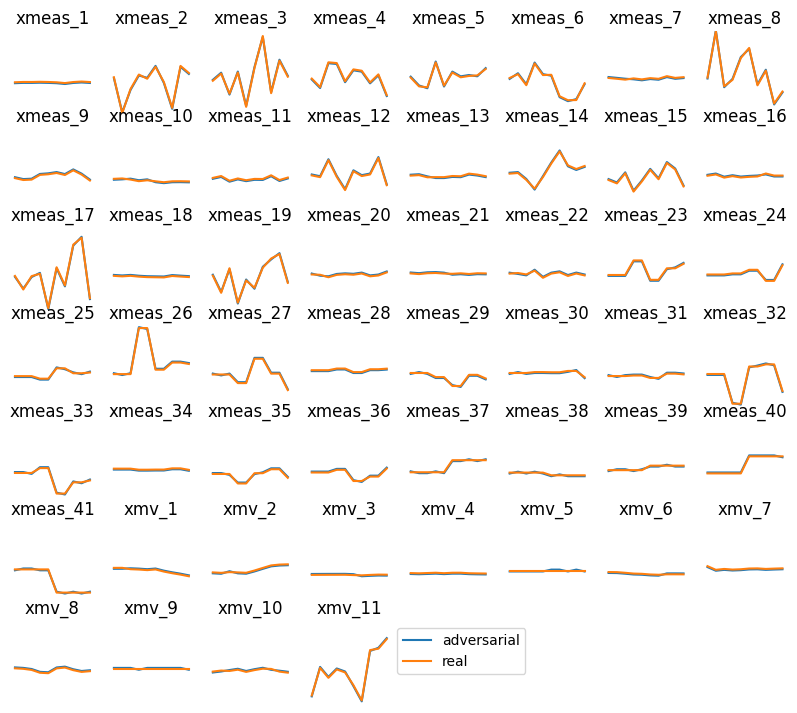

In [13]:
plt.figure(figsize=(10, 10))
for i in range(52):
    plt.subplot(8, 8, i+1)
    plt.title(dataset.df.columns[i])
    plt.plot(adv_sample.numpy()[0, :, i], label='adversarial')
    plt.plot(sample[0, :, i], label='real')
    plt.axis('off')
    plt.ylim(sample[0].min(), sample[0].max())
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Замеряем метрики на атакованных данных

In [14]:
pred = fddmodel_M.predict(adv_sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9861/0.0001
    Fault 02: 0.9900/0.0004
    Fault 03: 0.0001/0.0004
    Fault 04: 0.9300/0.0000
    Fault 05: 0.0034/0.0015
    Fault 06: 0.9979/0.0052
    Fault 07: 0.9980/0.0000
    Fault 08: 0.9706/0.0018
    Fault 09: 0.0276/0.0246
    Fault 10: 0.9521/0.0538
    Fault 11: 0.8627/0.0015
    Fault 12: 0.6439/0.0175
    Fault 13: 0.9698/0.0039
    Fault 14: 0.9840/0.0002
    Fault 15: 0.0000/0.0000
    Fault 16: 0.0016/0.0042
    Fault 17: 0.9686/0.0002
    Fault 18: 0.9296/0.0006
    Fault 19: 0.9824/0.0000
    Fault 20: 0.9671/0.0004
    Fault 21: 0.0000/0.0000
    Fault 22: 0.2630/0.3465
    Fault 23: 0.3940/0.4094
    Fault 24: 0.9720/0.0003
    Fault 25: 0.9528/0.0001
    Fault 26: 0.8498/0.1263
    Fault 27: 0.0384/0.0002
    Fault 28: 0.0001/0.0002
Detection TPR: 0.9967
Detection FPR: 0.9993
Average Detection Delay (ADD): 0.01
Total Correct Diagnosis Rate (Total CDR): 0.6319

Clustering metrics
-----------------
Adjusted R

In [ ]:
metrics = evaluator.evaluate(label, pred)
fpr = metrics['detection']['FPR']


False

PGDAttack на среднем датасете

In [19]:
attack = PGDAttack(model=fddmodel_M, eps=0.06)
for sample, index, label in test_loader:
    _sample = torch.FloatTensor(sample)
    _label = torch.LongTensor(label.values)
adv_sample = attack.attack(_sample, _label)

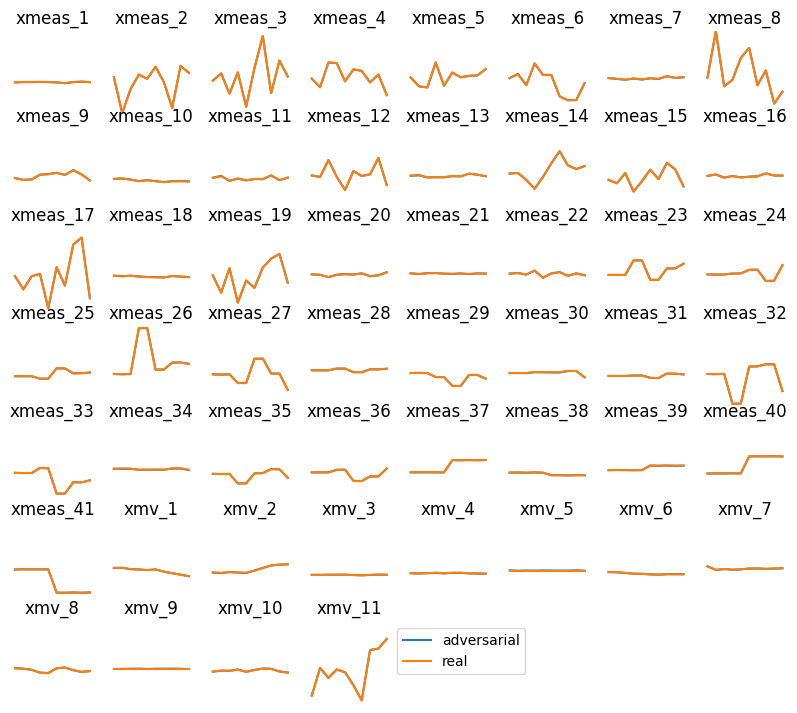

In [20]:
plt.figure(figsize=(10, 10))
for i in range(52):
    plt.subplot(8, 8, i+1)
    plt.title(dataset.df.columns[i])
    plt.plot(adv_sample.numpy()[0, :, i], label='adversarial')
    plt.plot(sample[0, :, i], label='real')
    plt.axis('off')
    plt.ylim(sample[0].min(), sample[0].max())
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [21]:
pred = fddmodel_M.predict(adv_sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9937/0.0000
    Fault 02: 0.9940/0.0002
    Fault 03: 0.0589/0.0434
    Fault 04: 0.9776/0.0000
    Fault 05: 0.1299/0.0041
    Fault 06: 0.9988/0.0000
    Fault 07: 0.9984/0.0000
    Fault 08: 0.9784/0.0003
    Fault 09: 0.0030/0.1616
    Fault 10: 0.9631/0.0009
    Fault 11: 0.9313/0.0000
    Fault 12: 0.8254/0.0014
    Fault 13: 0.9718/0.0015
    Fault 14: 0.9936/0.0000
    Fault 15: 0.0000/0.0001
    Fault 16: 0.0496/0.0629
    Fault 17: 0.9771/0.0003
    Fault 18: 0.9589/0.0004
    Fault 19: 0.9896/0.0002
    Fault 20: 0.9724/0.0023
    Fault 21: 0.0000/0.0002
    Fault 22: 0.1602/0.0235
    Fault 23: 0.5546/0.2577
    Fault 24: 0.9847/0.0002
    Fault 25: 0.9772/0.0003
    Fault 26: 0.9276/0.0110
    Fault 27: 0.7646/0.0003
    Fault 28: 0.0739/0.0081
Detection TPR: 0.8022
Detection FPR: 0.5809
Average Detection Delay (ADD): 8.99
Total Correct Diagnosis Rate (Total CDR): 0.8551

Clustering metrics
-----------------
Adjusted R

FPR 58%,(рост в 580 раз) 

DeepfoolAttack на маленьком датасете

In [21]:
attack = DeepfoolLinfAttack(model=fddmodel, eps=0.05,num_steps=10)
for sample, index, label in test_loader:
    _sample = torch.FloatTensor(sample)
    _label = torch.LongTensor(label.values)
adv_sample = attack.attack(_sample, _label)

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

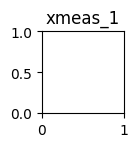

In [22]:
plt.figure(figsize=(10, 10))
for i in range(52):
    plt.subplot(8, 8, i+1)
    plt.title(dataset.df.columns[i])
    plt.plot(adv_sample.numpy()[0, :, i], label='adversarial')
    plt.plot(sample[0, :, i], label='real')
    plt.axis('off')
    plt.ylim(sample[0].min(), sample[0].max())
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
pred = fddmodel.predict(adv_sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

Ответ убил FP- 95% CDR - 35%

In [8]:

defender = AdversarialTrainingDefender(fddmodel, lambd=5)
attack = FGSMAttack(model=fddmodel, eps=0.05)
for sample, index, label in test_loader:
    _sample = torch.FloatTensor(sample)
    _label = torch.LongTensor(label.values)
adv_sample = attack.attack(_sample, _label)

Adversarial training...


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 5.5689


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 3.6571


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 3.0601


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 2.7287


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 2.5306


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 2.4206


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 2.3384


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 2.2793


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 2.2516


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 2.1933


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 2.1543


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 2.1249


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 2.0986


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 2.0776


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 2.0573


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 2.0477


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 2.0958


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 2.0375


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 2.0089


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 1.9906


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 1.9784


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 2.0033


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 1.9733


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 1.9570


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 1.9439


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 1.9353


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 1.9296


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 1.9456


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 2.1801


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 2.0289


In [9]:
pred = defender.predict(adv_sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9757/0.0001
    Fault 02: 0.9812/0.0040
    Fault 03: 0.0000/0.0000
    Fault 04: 0.6881/0.0012
    Fault 05: 0.7559/0.0024
    Fault 06: 0.9907/0.0000
    Fault 07: 0.9927/0.0001
    Fault 08: 0.6683/0.0156
    Fault 09: 0.0000/0.0000
    Fault 10: 0.4496/0.0934
    Fault 11: 0.7605/0.0355
    Fault 12: 0.5927/0.0010
    Fault 13: 0.7557/0.0201
    Fault 14: 0.9742/0.0013
    Fault 15: 0.0000/0.0000
    Fault 16: 0.5111/0.1252
    Fault 17: 0.8531/0.0003
    Fault 18: 0.6618/0.0092
    Fault 19: 0.5952/0.1332
    Fault 20: 0.5690/0.1657
Detection TPR: 0.8360
Detection FPR: 0.6082
Average Detection Delay (ADD): 2.73
Total Correct Diagnosis Rate (Total CDR): 0.7641

Clustering metrics
-----------------
Adjusted Rand Index (ARI): 0.3057
Normalized Mutual Information (NMI): 0.5883
Unsupervised Clustering Accuracy (ACC): 0.5896


Upgrade FP- 60%   CDR - 76%  TPR - 83%

In [10]:
defender = DistillationDefender(fddmodel)
attack = FGSMAttack(model=defender.fddmodel, eps=0.05)
for sample, index, label in test_loader:
    _sample = torch.FloatTensor(sample)
    _label = torch.LongTensor(label.values)
adv_sample = attack.attack(_sample, _label)

Training a student...


Epochs ...:   0%|          | 0/30 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1, Loss: 2.2995


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 2, Loss: 1.4968


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 3, Loss: 1.1011


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 4, Loss: 0.8931


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 5, Loss: 0.7907


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 6, Loss: 0.7229


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 7, Loss: 0.6663


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 8, Loss: 0.6186


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 9, Loss: 0.5797


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 10, Loss: 0.5473


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 11, Loss: 0.5190


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4931


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4689


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4461


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 15, Loss: 0.4244


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 16, Loss: 0.4038


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 17, Loss: 0.3843


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 18, Loss: 0.3661


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 19, Loss: 0.3491


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 20, Loss: 0.3333


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 21, Loss: 0.3187


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 22, Loss: 0.3052


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2928


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2813


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2708


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2611


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 27, Loss: 0.2522


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2440


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 29, Loss: 0.2365


Steps ...:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 30, Loss: 0.2296


In [11]:
pred = defender.predict(adv_sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9825/0.0023
    Fault 02: 0.9827/0.0050
    Fault 03: 0.0000/0.0000
    Fault 04: 0.9484/0.0000
    Fault 05: 0.9056/0.0015
    Fault 06: 0.8295/0.0000
    Fault 07: 0.9980/0.0000
    Fault 08: 0.8446/0.0046
    Fault 09: 0.0000/0.0000
    Fault 10: 0.5319/0.0501
    Fault 11: 0.7857/0.0071
    Fault 12: 0.6623/0.0001
    Fault 13: 0.8195/0.0070
    Fault 14: 0.9917/0.0000
    Fault 15: 0.0000/0.0000
    Fault 16: 0.4984/0.0705
    Fault 17: 0.9354/0.0013
    Fault 18: 0.4846/0.0235
    Fault 19: 0.5024/0.0694
    Fault 20: 0.6223/0.2096
Detection TPR: 0.8445
Detection FPR: 0.4519
Average Detection Delay (ADD): 3.39
Total Correct Diagnosis Rate (Total CDR): 0.7889

Clustering metrics
-----------------
Adjusted Rand Index (ARI): 0.3687
Normalized Mutual Information (NMI): 0.6342
Unsupervised Clustering Accuracy (ACC): 0.6428


tpr 84% fpr 45% cdr 78%

In [12]:
defender = QuantizationDefender(fddmodel, qbit=10)
attack = FGSMAttack(model=defender.fddmodel, eps=0.05)
for sample, index, label in test_loader:
    _sample = torch.FloatTensor(sample)
    _label = torch.LongTensor(label.values)
adv_sample = attack.attack(_sample, _label)

In [13]:
pred = defender.predict(adv_sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9757/0.0001
    Fault 02: 0.9812/0.0040
    Fault 03: 0.0000/0.0000
    Fault 04: 0.6866/0.0012
    Fault 05: 0.7537/0.0024
    Fault 06: 0.9907/0.0000
    Fault 07: 0.9927/0.0001
    Fault 08: 0.6681/0.0156
    Fault 09: 0.0000/0.0000
    Fault 10: 0.4496/0.0934
    Fault 11: 0.7599/0.0355
    Fault 12: 0.5930/0.0010
    Fault 13: 0.7557/0.0190
    Fault 14: 0.9745/0.0013
    Fault 15: 0.0000/0.0000
    Fault 16: 0.5111/0.1251
    Fault 17: 0.8531/0.0013
    Fault 18: 0.6618/0.0092
    Fault 19: 0.5947/0.1332
    Fault 20: 0.5692/0.1670
Detection TPR: 0.8360
Detection FPR: 0.6093
Average Detection Delay (ADD): 2.71
Total Correct Diagnosis Rate (Total CDR): 0.7638

Clustering metrics
-----------------
Adjusted Rand Index (ARI): 0.3053
Normalized Mutual Information (NMI): 0.5878
Unsupervised Clustering Accuracy (ACC): 0.5892


fpr 83% fpr 60% cdr 76%